In [1]:
#!pip install split-folders==0.5.0

In [2]:
# setting up the Environment:
# To read data and numerical calculation:
import numpy as np
import pandas as pd
import os
import splitfolders


#Graph plotting libaries:
import matplotlib.pyplot as plt
import seaborn as sns

#Image viewing libaries:
import cv2
import glob
from PIL import Image

# Tensorflow libaries:
import tensorflow
import keras

# Image preprocessing libaries:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#VGG16 Model Archiecture:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Activation,Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model


In [3]:
path=r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Raw_Dataset\Raw Datasets'
#os.chdir(path)
training_dir=os.listdir(path)
print("number of classes:",len(os.listdir(path)))
print(os.listdir(path))

number of classes: 5
['cerebrovascular brain', 'Degenerative disease', 'Inflammatory Disease', 'Neoplastic Disease', 'Normal brain']


In [4]:
train_datagen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=[0, 0.1],horizontal_flip=True,shear_range=0.02,height_shift_range=[0, 0.1],fill_mode='nearest')
valid_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset=train_datagen.flow_from_directory(directory=r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\train', target_size=(128,128),batch_size=20,shuffle=True,subset='training',color_mode='rgb',class_mode='categorical',seed=21)
valid_dataset=valid_datagen.flow_from_directory(directory=r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\val', target_size=(128,128),batch_size=20,shuffle=True,color_mode='rgb',class_mode='categorical',seed=21)
test_dataset=test_datagen.flow_from_directory(directory=r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\test', target_size=(128,128),batch_size=1,shuffle=False,class_mode=None,seed=21)

Found 3936 images belonging to 5 classes.
Found 490 images belonging to 5 classes.
Found 496 images belonging to 5 classes.


In [6]:
model=VGG16()

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
len(model.layers)

23

In [8]:
model=VGG16(input_shape=(128,128,3), include_top=False,weights="imagenet")
model.trainable=False
#for layer in model.layers[:100]:
    #layer.trainable = False

In [9]:
tensorflow.random.set_seed(21)
model=tensorflow.keras.models.Sequential([
    model,
    tensorflow.keras.layers.GlobalAveragePooling2D(),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Dense(512,activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Dense(256,activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Dense(128,activation='relu'),
    tensorflow.keras.layers.Dense(5,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2

In [10]:
opt = Adam(learning_rate=1e-5)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# batch_size=20

# history=model.fit(train_dataset,steps_per_epoch=train_dataset.n//batch_size,validation_data=valid_dataset,validation_steps=valid_dataset.n//batch_size, epochs=25)

In [12]:
#model.save(r"C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Models\VGG16.h5")

In [13]:
# plt.subplot(211)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model_accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('epoch')
# plt.legend(['train','val'],loc='upper left')

# plt.subplot(212)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# #plt.title('Base_model_accuracy')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','val'],loc='upper left')
# plt.show()

In [14]:
model = load_model(r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Models\VGG16.h5')

In [15]:
model_new=model
accuracy_score = model_new.evaluate(train_dataset)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

197/197 [==============================] - 317s 2s/step - loss: 0.1364 - accuracy: 0.9629
[0.13641276955604553, 0.9629064798355103]
Accuracy: 96.2906%
Loss:  0.13641276955604553


In [16]:
accuracy_score = model_new.evaluate(valid_dataset)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

25/25 [==============================] - 39s 2s/step - loss: 0.1396 - accuracy: 0.9510
[0.13964413106441498, 0.9510204195976257]
Accuracy: 95.1020%
Loss:  0.13964413106441498


In [17]:
predictions_model=[]
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
test_labels=test_dataset.classes
for i in range(0,test_dataset.n):
    predictions=model_new.predict(test_dataset[i])
    predictions=np.argmax(predictions)
    predictions_model.append(predictions)
#print(predictions,np.argmax(predictions))
#np.argmax(predictions);
#predictions_model.append(s)
print(classification_report(test_labels,predictions_model))

1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 232ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        82
           1       0.95      0.91      0.93        69
           2       0.85      0.90      0.87        58
           3       0.98      0.99      0.99       172
           4       0.96      0.90      0.93       115

    accuracy                           0.95       496
   macro avg       0.94      0.94      0.94       496
weighted avg       0.95      0.95      0.95       496



In [18]:
confusion_matrix(test_labels,predictions_model)

array([[ 82,   0,   0,   0,   0],
       [  0,  63,   4,   0,   2],
       [  0,   2,  52,   3,   1],
       [  0,   0,   0, 171,   1],
       [  6,   1,   5,   0, 103]], dtype=int64)

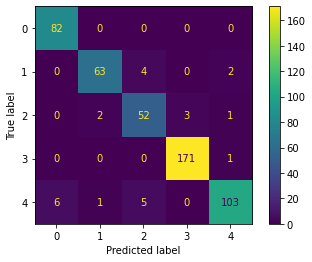

In [19]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_labels,predictions_model),display_labels=np.unique(test_dataset.classes))
cm_display.plot()
plt.show()

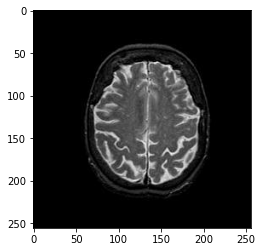

In [20]:
from skimage.io import imread
from skimage import transform
I_test=imread(r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\test\Normal brain\Normal brain (309).jpg')
plt.imshow(I_test)

In [21]:
I_test=np.array(I_test).astype('float32')/255
I_test=transform.resize(I_test, (128, 128, 3))
I_test= np.expand_dims(I_test, axis=0)
I_test.shape

(1, 128, 128, 3)

In [22]:
predictions=model_new.predict(I_test)
predictions=np.argmax(predictions)
print(predictions)

1/1 [==============================] - 0s 79ms/step
3


In [23]:
num_classes_train = len(train_dataset.class_indices)
class_names_train = list(train_dataset.class_indices.keys())
print("Number of classes in the training dataset:", num_classes_train)
print("Class names in the training dataset:", class_names_train)

Number of classes in the training dataset: 5
Class names in the training dataset: ['Degenerative disease', 'Inflammatory Disease', 'Neoplastic Disease', 'Normal brain', 'cerebrovascular brain']
